ANALISIS PREDICTIVO 

    ¿Qué factores aumentan la probabilidad de que un accidente involucre múltiples vehículos?

In [1]:
#IMPORTAR LIBRERIAS
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#CARGUE DE DATOS
df = pd.read_csv('ACCIDENTESVIALES_3.csv', encoding='latin-1')
df.head()

,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Tipo_via,Barrio,Vehiculos Involucrados,Heridos,Tipo_accidente,Muertes SI/NO,# Muertes,Clase de Accidente,Unnamed: 11
0,01/03/2024,A001602262,CALLE 14A CARRERA 34 BACHUE,SECUNDARIA,BACHUE,2,2,HERIDOS,0,0,CHOQUE,NaN
1,01/06/2024,A001602263,CALLE 14 CARRERA 28 SAN JOSÃ,SECUNDARIA,SAN JOSÃ,2,3,HERIDOS,0,0,CHOQUE,NaN
2,01/09/2024,A001602264,KILOMETRO 7+800 MTS,PRINCIPAL,No registra,1,1,HERIDOS,0,0,CHOQUE,NaN
3,01/12/2024,A001602265,AVENIDA 23 N. 24 - 07 LA TIZA,PRINCIPAL,LA TIZA,2,2,HERIDOS,0,0,CHOQUE,NaN
4,01/12/2024,A001602266,KILOMETRO 3+500 MTS VIA CHICHIMENE ESTACION AC...,PRINCIPAL,No registra,2,1,HERIDOS,0,0,CHOQUE,NaN


In [21]:
#CREACIÓN DE COLUMNA DIA DE LA SEMANA PARA FORTALECER EL ANALISIS
import pandas as pd

# Convierte la columna correcta a datetime
df['Fecha_Ocurrencia'] = pd.to_datetime(df['Fecha_Ocurrencia'], errors='coerce')

# Crea la columna con el nombre del día de la semana
df['Dia_semana'] = df['Fecha_Ocurrencia'].dt.day_name()

# Verifica
print(df[['Fecha_Ocurrencia', 'Dia_semana']].head())

  Fecha_Ocurrencia Dia_semana
0       2024-01-03  Wednesday
1       2024-01-06   Saturday
2       2024-01-09    Tuesday
3       2024-01-12     Friday
4       2024-01-12     Friday


In [ ]:
#Verificar que se haya incluído la columna Dia_semana
df.head()

,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Tipo_via,Barrio,Vehiculos Involucrados,Heridos,Tipo_accidente,Muertes SI/NO,# Muertes,Clase de Accidente,Unnamed: 11,Muertes_binaria,Dia_semana
0,2024-01-03,A001602262,CALLE 14A CARRERA 34 BACHUE,SECUNDARIA,BACHUE,2,2,HERIDOS,0,0,CHOQUE,NaN,0,Wednesday
1,2024-01-06,A001602263,CALLE 14 CARRERA 28 SAN JOSÃ,SECUNDARIA,SAN JOSÃ,2,3,HERIDOS,0,0,CHOQUE,NaN,0,Saturday
2,2024-01-09,A001602264,KILOMETRO 7+800 MTS,PRINCIPAL,No registra,1,1,HERIDOS,0,0,CHOQUE,NaN,0,Tuesday
3,2024-01-12,A001602265,AVENIDA 23 N. 24 - 07 LA TIZA,PRINCIPAL,LA TIZA,2,2,HERIDOS,0,0,CHOQUE,NaN,0,Friday
4,2024-01-12,A001602266,KILOMETRO 3+500 MTS VIA CHICHIMENE ESTACION AC...,PRINCIPAL,No registra,2,1,HERIDOS,0,0,CHOQUE,NaN,0,Friday


In [23]:
#REVISAR ESTRUCTURA DATA SET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha_Ocurrencia        209 non-null    datetime64[ns]
 1   Codigo_Accidente        512 non-null    object        
 2   Direccion               512 non-null    object        
 3   Tipo_via                512 non-null    object        
 4   Barrio                  512 non-null    object        
 5   Vehiculos Involucrados  512 non-null    int64         
 6   Heridos                 512 non-null    int64         
 7   Tipo_accidente          512 non-null    object        
 8   Muertes SI/NO           512 non-null    int64         
 9   # Muertes               512 non-null    int64         
 10  Clase de Accidente      512 non-null    object        
 11  Unnamed: 11             0 non-null      float64       
 12  Muertes_binaria         512 non-null    int64     

In [24]:
#DESCRIPCIÓN GENERAL
df.describe(include='all')

,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Tipo_via,Barrio,Vehiculos Involucrados,Heridos,Tipo_accidente,Muertes SI/NO,# Muertes,Clase de Accidente,Unnamed: 11,Muertes_binaria,Dia_semana
count,209,512,512,512,512,512.000000,512.000000,512,512.000000,512.000000,512,0.0,512.000000,209
unique,NaN,509,503,2,52,NaN,NaN,3,NaN,NaN,4,NaN,NaN,7
top,NaN,A001371905,CALLE 13 CARRERA 16 CENTRO,SECUNDARIA,No registra,NaN,NaN,HERIDOS,NaN,NaN,CHOQUE,NaN,NaN,Saturday
freq,NaN,2,2,341,115,NaN,NaN,412,NaN,NaN,450,NaN,NaN,39
mean,2023-05-16 10:26:59.138756096,NaN,NaN,NaN,NaN,1.865234,1.298828,NaN,0.080078,0.095703,NaN,NaN,0.080078,NaN
min,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN
25%,2022-07-12 00:00:00,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN
50%,2023-04-07 00:00:00,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN
75%,2024-01-15 00:00:00,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN
max,2024-12-11 00:00:00,NaN,NaN,NaN,NaN,4.000000,5.000000,NaN,1.000000,3.000000,NaN,NaN,1.000000,NaN


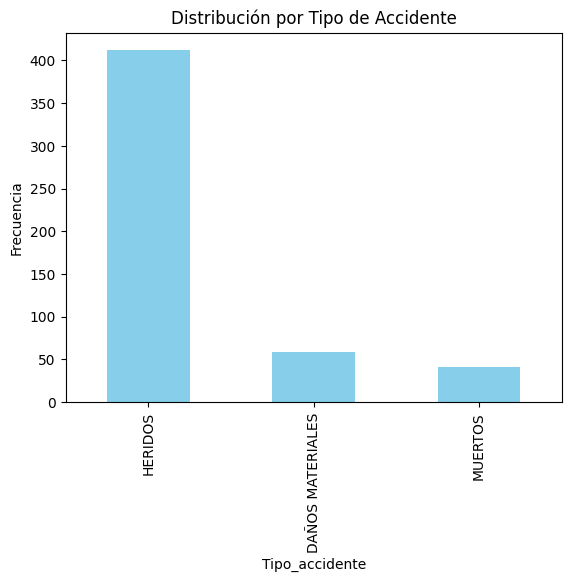

In [ ]:
# GRAFICO 1
# DISTRIBUCIÓN TIPO DE ACCIDENTE
df['Tipo_accidente'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución por Tipo de Accidente')
plt.xlabel('Tipo_accidente')
plt.ylabel('Frecuencia')
plt.show()

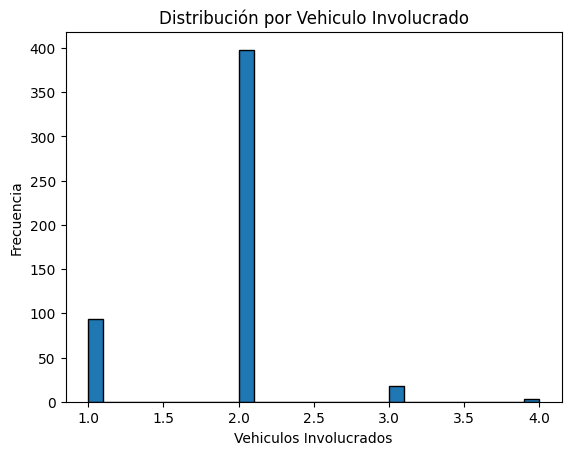

In [6]:
#GRAFICO 2
# DISTRIBUCIÓN POR VEHÍCULO INVOLUCRADO

df['Vehiculos Involucrados'].dropna().plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribución por Vehiculo Involucrado')
plt.xlabel('Vehiculos Involucrados')
plt.ylabel('Frecuencia')
plt.show()

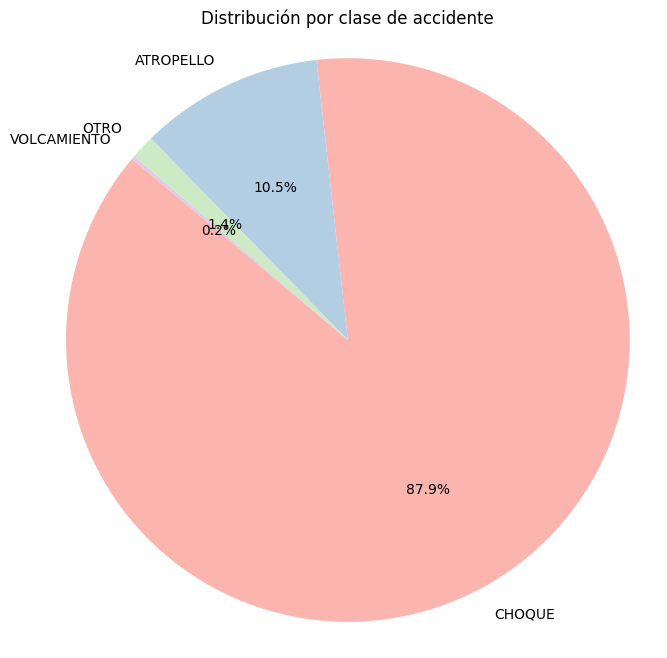

In [ ]:
#GRAFICO 3
#DISTRIBUCIÓN POR CLASE DE ACCIDENTE
clase_accidente = df['Clase de Accidente'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(clase_accidente,
        labels=clase_accidente.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel1.colors)
plt.title('Distribución por clase de accidente')
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()

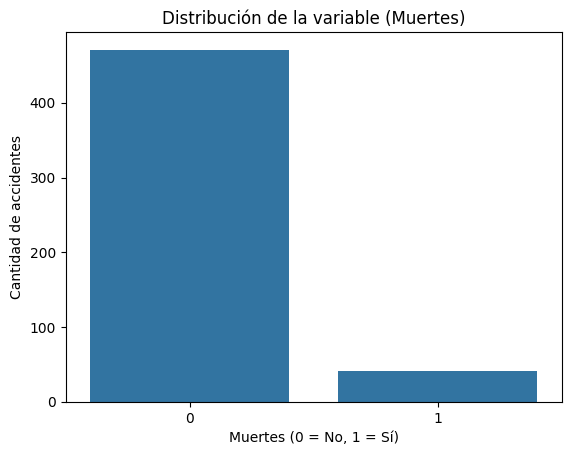

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Muertes SI/NO')
plt.title('Distribución de la variable (Muertes)')
plt.xlabel('Muertes (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de accidentes')
plt.show()

EVALUACIÓN PREDICTIVA ANTES Y DESPUÉS DE LA LIMPIEZA

In [41]:
#REVISIÓN DE DATOS
print(df['Vehiculos_objetivo'].value_counts())
print(df['Vehiculos_objetivo'].value_counts(normalize=True) * 100)


Vehiculos_objetivo
2    398
1     93
3     18
4      3
Name: count, dtype: int64
Vehiculos_objetivo
2    77.734375
1    18.164062
3     3.515625
4     0.585938
Name: proportion, dtype: float64


In [37]:
#CREAR VARIABLE OBJETIVO
df["Vehiculos_objetivo"] = df["Vehiculos Involucrados"]

In [42]:
#EVALUACIÓN DEL MODELO ANTES DE LA LIMPIEZA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

variables_modelo = ['Tipo_accidente', 'Dia_semana', 'Direccion']

df_before = df[variables_modelo + ['Vehiculos_objetivo']].dropna()

Xb = df_before[variables_modelo]
yb = df_before['Vehiculos_objetivo']

Xb = pd.get_dummies(Xb, drop_first=True)

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state=42)

model_before = LogisticRegression(max_iter=200)
model_before.fit(Xb_train, yb_train)

yb_pred = model_before.predict(Xb_test)
acc_before = accuracy_score(yb_test, yb_pred)

print("Exactitud del modelo (logística multinomial):", round(acc_before, 4))

Exactitud del modelo (logística multinomial): 0.746


Se evidencia que, el modelo de regresión logística multinomial logró una exactitud del 74.6%, lo que indica que puede predecir correctamente la categoría del número de vehículos involucrados en casi tres de cada cuatro accidentes.

In [ ]:
#PREPARACIÓN DEL DATASET: LIMPIEZA, IMPUTACIÓN Y CODIFICACIÓN 

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

df_clean = df.copy()

# Imputar valores faltantes en variables numéricas
imputer_vehiculos = SimpleImputer(strategy='median')
df_clean['Vehiculos Involucrados'] = imputer_vehiculos.fit_transform(df_clean[['Vehiculos Involucrados']])

imputer_heridos = SimpleImputer(strategy='median')
df_clean['Heridos'] = imputer_heridos.fit_transform(df_clean[['Heridos']])

imputer_tipo = SimpleImputer(strategy='most_frequent')
df_clean['Tipo_accidente'] = imputer_tipo.fit_transform(df_clean[['Tipo_accidente']]).ravel()

df_clean = pd.get_dummies(df_clean, columns=['Tipo_accidente', 'Dia_semana', 'Direccion'], drop_first=True)

scaler = MinMaxScaler()
df_clean[['Vehiculos Involucrados', 'Heridos']] = scaler.fit_transform(df_clean[['Vehiculos Involucrados', 'Heridos']])

# Seleccionar variables predictoras y variable objetivo
variables_modelo = [col for col in df_clean.columns if col.startswith('Vehiculos Involucrados') or col.startswith('Heridos') or col.startswith('Tipo_accidente_') or col.startswith('Dia_semana_') or col.startswith('Direccion_')]

X = df_clean[variables_modelo]
y = df_clean['Vehiculos_objetivo']  

# Eliminar filas con NA en variable objetivo
mask = y.notna()
X = X[mask]
y = y[mask]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de regresión logística multinomial
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Exactitud del modelo (logística multinomial):", round(accuracy, 4))


Exactitud del modelo (logística multinomial): 0.9416


Se evidencia que, el modelo tiene un buen rendimiento. Una exactitud de 94.16% indica que el modelo clasifica correctamente la mayoría de los casos, lo cual es sólido. 

In [ ]:
#PREPARACIÓN DEL DATASET: LIMPIEZA, IMPUTACIÓN Y CODIFICACIÓN 

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

df_clean = df.copy()

# Imputar valores faltantes en variables numéricas
imputer_vehiculos = SimpleImputer(strategy='median')
df_clean['Vehiculos Involucrados'] = imputer_vehiculos.fit_transform(df_clean[['Vehiculos Involucrados']])

imputer_heridos = SimpleImputer(strategy='median')
df_clean['Heridos'] = imputer_heridos.fit_transform(df_clean[['Heridos']])

imputer_tipo = SimpleImputer(strategy='most_frequent')
df_clean['Tipo_accidente'] = imputer_tipo.fit_transform(df_clean[['Tipo_accidente']]).ravel()

df_clean = pd.get_dummies(df_clean, columns=['Tipo_accidente', 'Dia_semana', 'Direccion'], drop_first=True)

scaler = MinMaxScaler()
df_clean[['Vehiculos Involucrados', 'Heridos']] = scaler.fit_transform(df_clean[['Vehiculos Involucrados', 'Heridos']])

# Seleccionar variables predictoras y variable objetivo
variables_modelo = [col for col in df_clean.columns if col.startswith('Vehiculos Involucrados') or col.startswith('Heridos') or col.startswith('Tipo_accidente_') or col.startswith('Dia_semana_') or col.startswith('Direccion_')]

X = df_clean[variables_modelo]
y = df_clean['Vehiculos_objetivo']  

# Eliminar filas con NA en variable objetivo
mask = y.notna()
X = X[mask]
y = y[mask]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de regresión logística multinomial
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Exactitud del modelo (logística multinomial):", round(accuracy, 4))


Exactitud del modelo (logística multinomial): 0.9416


Se agregan e imputan variables numéricas importantes: Vehiculos involucrados y Heridos, con la finalidad de mejorar el rendimiento.

In [ ]:
#EVALUACIÓN DEL MODELO DESPUÉS DE LA LIMPIEZA

# Variables predictoras
variables_modelo = [col for col in df_clean.columns if col.startswith('Vehiculos Involucrados') or col.startswith('Heridos') or col.startswith('Tipo_accidente_') or col.startswith('Dia_semana_') or col.startswith('Direccion_')]

# Variable predictora (X)
Xc = df_clean[variables_modelo]

yc = df_clean['Vehiculos_objetivo']

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)

# Modelo de regresión logística
model_after = LogisticRegression(max_iter=200)
model_after.fit(Xc_train, yc_train)

# Predicción y evaluación
yc_pred = model_after.predict(Xc_test)
acc_after = accuracy_score(yc_test, yc_pred)

print("✅ Exactitud después de la limpieza:", round(acc_after, 4))


✅ Exactitud después de la limpieza: 0.9416


Se evidencia que, con las variables limpias y transformadas (incluyendo Heridos y Vehículos Involucrados), mantiene un rendimiento alto del modelo.

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


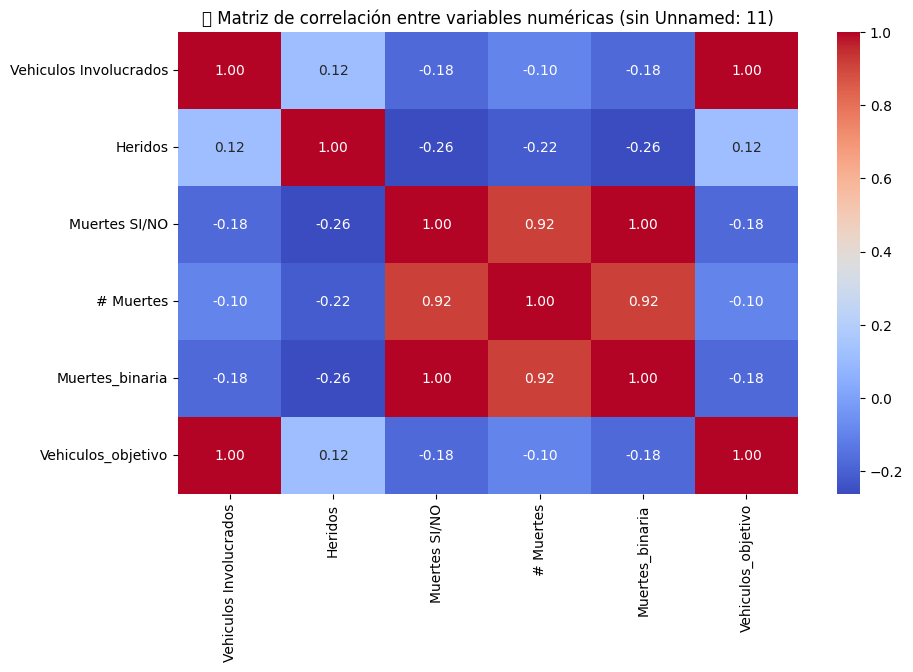

In [ ]:
#1) MATRIZ DE CORRELACIÓN (VARIABLES NUMÉRICAS)

import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las variables numéricas
variables_numericas = df_clean.select_dtypes(include=['float64', 'int64'])

# Eliminar la columna 'Unnamed: 11' si existe
if 'Unnamed: 11' in variables_numericas.columns:
    variables_numericas = variables_numericas.drop(columns=['Unnamed: 11'])

# Mapa de calor de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(variables_numericas.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('🔍 Matriz de correlación entre variables numéricas (sin Unnamed: 11)')
plt.show()

ANALISIS EXPLORATORIO INICIAL: Se conocen y limpian los datos numéricos, con el objetivo de identificar relaciones variables.

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


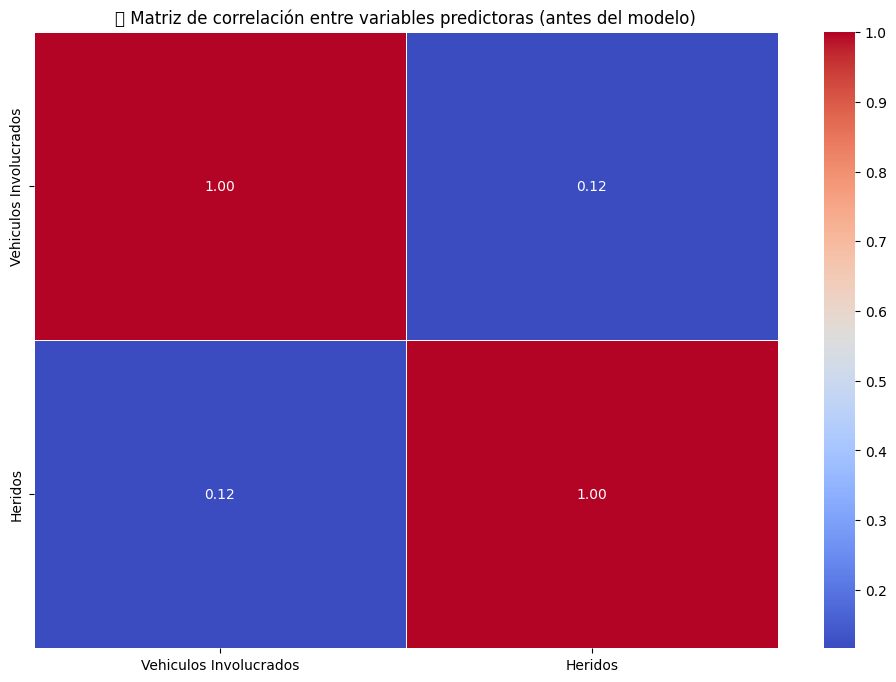

In [54]:
# 2) MATRIZ DE CORRELACIÓN (VARIABLES PREDICTORIAS)

import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las variables numéricas predictoras
variables_predictoras = [col for col in df_clean.columns if col.startswith('Vehiculos Involucrados') or 
                         col.startswith('Heridos') or
                         col.startswith('Tipo_accidente') or
                         col.startswith('Dia_semana') or
                         col.startswith('Direccion')]

# Filtrar solo las columnas numéricas (por si hay dummies)
df_predictoras = df_clean[variables_predictoras].select_dtypes(include='number')

# Generar matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_predictoras.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('🔍 Matriz de correlación entre variables predictoras (antes del modelo)')
plt.show()


ANALISIS ANTES DEL MODELO: Aquí se analizan unicamente las variables predictorias